<a href="https://colab.research.google.com/github/UTDataMining/2022A/blob/main/lab9/sklearn5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰

In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/ex8/iris.csv

In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
%matplotlib inline

以下では、ロジスティック回帰（`LogisticRegression`）クラスをインポートしています。`train_test_split()`はデータセットを訓練データとテストデータに分割するための関数、`accuracy_score()`はモデルの予測精度を評価するための関数です。

[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

入力データ（`X`）とラベルデータ（`y`）からなるデータセットを訓練データ（`X_train`, `y_train`）とテストデータ（`X_test`, `y_test`)に分割しています。ここでは、`train_test_split()`関数の`test_size`引数にデータセットの30%をテストデータとすることを指定しています。また、`stratify`引数にラベルデータを指定することで、訓練データとテストデータ、それぞれでラベルの分布が同じになるようにしています。入力の特徴量は`StandardScaler`で標準化しています。

ロジスティック回帰クラスのインスタンスを作成し、**`fit`**`()`メソッドによりモデルを訓練データに適合させています。そして、**`predict`**`()`メソッドを用いてテストデータのラベルを予測し、`accuracy_score()`関数などで実際のラベルデータ（`y_test`）と比較して予測精度の評価を行なっています。

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score

iris = pd.read_csv('iris.csv')
X=iris[(iris['species']=='versicolor')| (iris['species']=='virginica')][['petal_length', 'petal_width']].values
y=iris[(iris['species']=='versicolor')| (iris['species']=='virginica')]['species'].map({'virginica':0,'versicolor':1})

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化
sc=StandardScaler() 
sc.fit(X_train)
norm_X_train=sc.transform(X_train) 
norm_X_test=sc.transform(X_test) 

In [4]:
model=LogisticRegression(solver='lbfgs',  multi_class='auto') # ロジスティック回帰モデル
model.fit(norm_X_train, y_train) # モデルを訓練データに適合

#print(model.coef_) # パラメータ重み
#print(model.intercept_) # バイアス重み

y_pred=model.predict(norm_X_test) # テストデータでラベルを予測

# print(model.predict_proba(norm_X_test)) # 各テストデータのラベル1or0であるかの確率の推定値

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[14  1]
 [ 0 15]]
0.9666666666666667
0.9375
1.0
0.967741935483871


`LogisticRegression`ではデフォルトで正則化（$L_2$ノルム）が有効になっています。引数`C`は正則化項の係数の逆数になっています。

In [5]:
model=LogisticRegression(solver='lbfgs',  multi_class='auto', C=100) # ロジスティック回帰モデル、正則化の係数を指定
model.fit(norm_X_train, y_train) # モデルを訓練データに適合

#print(model.coef_) # パラメータ重み
#print(model.intercept_) # バイアス重み

y_pred=model.predict(norm_X_test) # テストデータでラベルを予測

# print(model.predict_proba(norm_X_test)) # 各テストデータのラベル1or0であるかの確率の推定値

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[14  1]
 [ 0 15]]
0.9666666666666667
0.9375
1.0
0.967741935483871


## 手書き数字画像認識

In [6]:
from sklearn import datasets
from PIL import Image, ImageOps, ImageEnhance

![digits](https://raw.githubusercontent.com/UTDataMining/2022A/master/lab9/digits.png)

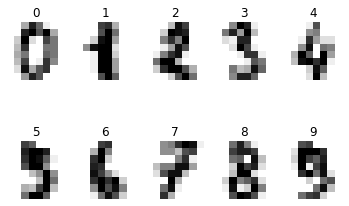

In [7]:
digits = datasets.load_digits() # 手書き数字画像データセット
for i,j in enumerate(range(10)):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.title(str(i))
    plt.imshow(digits.images[j], cmap='gray_r');

[[ 0.  0.  3. 10. 14.  3.  0.  0.]
 [ 0.  8. 16. 11. 10. 13.  0.  0.]
 [ 0.  7. 14.  0.  1. 15.  2.  0.]
 [ 0.  2. 16.  9. 16. 16.  1.  0.]
 [ 0.  0. 12. 16. 15. 15.  2.  0.]
 [ 0.  0. 12. 10.  0.  8.  8.  0.]
 [ 0.  0.  9. 12.  4.  7. 12.  0.]
 [ 0.  0.  2. 11. 16. 16.  9.  0.]]
[ 0.  0.  3. 10. 14.  3.  0.  0.  0.  8. 16. 11. 10. 13.  0.  0.  0.  7.
 14.  0.  1. 15.  2.  0.  0.  2. 16.  9. 16. 16.  1.  0.  0.  0. 12. 16.
 15. 15.  2.  0.  0.  0. 12. 10.  0.  8.  8.  0.  0.  0.  9. 12.  4.  7.
 12.  0.  0.  0.  2. 11. 16. 16.  9.  0.]
8


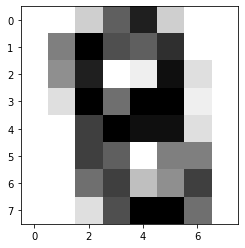

In [8]:
n = 500 # 画像のインデックス 
print(digits.images[n]) #  2次元ピクセルデータ
print(digits.data[n])  # 1次元ピクセルデータ
print(digits.target[n]) # ラベル
plt.imshow(digits.images[n], cmap='gray_r') # 手書き数字画像
plt.show()

In [9]:
# 画像分類モデルをロジスティック回帰で学習
X = digits.data
y = digits.target
model = LogisticRegression(solver='liblinear', multi_class='auto')
model = model.fit(X, y)

In [ ]:
# 認識させる手書き数字画像をダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2022A/master/lab9/8.jpeg

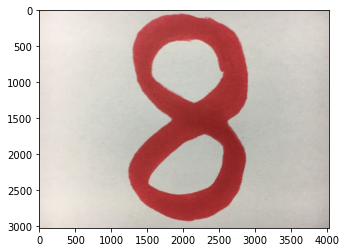

In [13]:
filename = '8.jpeg'
im = Image.open(filename)
plt.imshow(im, cmap='gray_r')
plt.show()

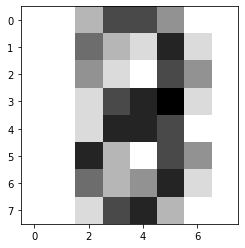

In [14]:
im_width, im_height= im.size
square_len = min(im.size)
im = im.crop(((im_width - square_len) // 2,(im_height - square_len) // 2,
(im_width + square_len) // 2,(im_height + square_len) // 2)) # 正方形に切り取り
im = ImageEnhance.Brightness(im).enhance(2.0) # 輝度変更
im = im.convert('L') # グレースケール 
im =  ImageOps.invert(im) # 白黒反転
im = im.resize((8, 8), Image.LANCZOS) # リサイズ
digit = np.asarray(im)
digit = np.round(16*(digit/255)) # 画素値変更
plt.imshow(digit, cmap='gray_r')
plt.show()

In [15]:
digit = digit.reshape(1, -1)
digit_pred = model.predict(digit)
print('予測されたラベル: ', digit_pred)
digit_pred_prob = model.predict_proba(digit) 
for i, prob in enumerate(digit_pred_prob[0]):
    print('数字'+str(i)+'の確率(%): '+'{:.2f}'.format(prob*100))

予測されたラベル:  [8]
数字0の確率(%): 0.09
数字1の確率(%): 0.27
数字2の確率(%): 0.07
数字3の確率(%): 1.20
数字4の確率(%): 0.00
数字5の確率(%): 0.00
数字6の確率(%): 7.20
数字7の確率(%): 0.03
数字8の確率(%): 90.85
数字9の確率(%): 0.29
